# Naive Bayes

Der "Naive Bayes Classifier" ist ein *Klassifizierungs*-Algorithmus, der auf dem *Satz von Bayes* aufbaut.

## Fragen

- Was ist Maschinenlernen?
- Wie funktioniert Naive Bayes?
- Wann kann ich Naive Bayes benutzen?

# Was ist Maschinenlernen?

- Computer-gestützte Analyse großer Datenmengen
- Wir z.B. verwendet für:
    - Spracherkennung (NLP)
    - Wettervorhersage
    - Vorhersage der Wirksamkeit eines Medikaments
    - Autonomes Fahren
    - Betrugserkennung (Fraud Detection)

## Was braucht man für Maschinenlernen?

- einen Algorithmus
- Trainings-Daten

# Terminologie

*Satz von Bayes*: $ P_B(A)=\frac {P_A(B) \cdot P(A)}{P(B)} $

*Klassifzierungs-Algorithmus*: Ein Algorithmus, der einen Datensatz $X$ mit den Merkmalen $x_1,...,x_n$ einer Klasse $C$ zuordnet

## Ein Ballspiel:

| Stollen | Schläger | Ballgröße | *Sport*      |
| ------- | -------- | --------- | ------------ |
| Nein    | Ja       | Klein     | *Badminton*  |
| Nein    | Nein     | Groß      | *Fußball*    |
| Nein    | Ja       | Mittel    | *Tennis*     |
| Nein    | Ja       | Klein     | *Golf*       |
| Nein    | Nein     | Groß      | *Basketball* |
| Ja      | Nein     | Groß      | *Fußball*    |
| Ja      | Ja       | Klein     | *Golf*       |

Du triffst einen Sportler.
Er hat *keine Stollenschuhe*, einen *Schläger* auf dem Rücken und balanciert einen *kleinen Ball* lässig auf der Nase.

**Frage:** Welche Sportart übt der Sportler aus?

**Antwort:** Golf oder Badminton.

## Übung!

Ich erhalte jedes Jahr 10.000 Emails.
Davon sind 5.000 Spam.
Manche der Emails enthalten die Wörter "Viagra", "Nigerianischer Prinz" oder "Angebot".

| []() | Viagra | Nigerianischer Prinz | Angebot |
| ---- | ------ | ----- | ------- |
| Spam | 3000   | 2000  | 4000    |
| Kein Spam | 1 | 10    | 100     |

Frage: Wie Hoch ist die Wahrscheinlichkeit, dass eine Email Spam ist, wenn sie die Wörter "Viagra", "Nigerianischer Prinz" und "Angebot" enthält?

$$
P_{V \cap N \cap A}(S)
$$

$$
= \frac{P_S({V \cap N \cap A}) \cdot P(S)}{P(V \cap N \cap A)}
$$

$$
= \frac{P_S(V) \cdot P_S(N) \cdot P_S(A) \cdot P(S)}{P(V) \cdot P(N) \cdot P(A)}
$$

Achtung: $P(A \cap B) = P(A) \cdot P(B)$ gilt nur, wenn $A$ und $B$ stochastisch unabhängig sind.

![Spam-Example](Spam-Example.png)

Berechne: $P_{V \cap N \cap A}(S)$

Berechne:

1. $P_{V \cap N \cap \bar{A}}(S)$
2. $P_{V \cap N \cap \bar{A}}(\bar{S})$

In [254]:
read_data <- function() {
    dataset <- read.table("StudentsPerformance.csv", header=TRUE, sep = ",")
    dataset$math.score <- factor(round(dataset$math.score, -1))
    dataset$reading.score <- factor(round(dataset$reading.score, -1))
    dataset$writing.score <- factor(round(dataset$writing.score, -1))
    return(dataset)
}

In [255]:
dataset <- read_data();
# summary(dataset);
head(dataset);

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
female,group B,bachelor's degree,standard,none,70,70,70
female,group C,some college,standard,completed,70,90,90
female,group B,master's degree,standard,none,90,100,90
male,group A,associate's degree,free/reduced,none,50,60,40
male,group C,some college,standard,none,80,80,80
female,group B,associate's degree,standard,none,70,80,80


In [256]:
library(plyr);

dataset <- read_data();

possibleScores <- unique(dataset$math.score);

probabilityOfFeature <- function(ds, feature, fact) {
    total <- length(ds);
    
    counts <- count(ds, feature);
    countOfFeature <- as.numeric(counts[counts[feature] == fact][2]);
    
    return (countOfFeature / total);
}

predict <- function(gender, ethnicity, education, lunch, prep) {
    scoresWithPossibility <- ldply(possibleScores, function(score) {
        datasetForScore <- dataset[dataset$math.score == score, ];
        
        p_score <- length(datasetForScore) / length(dataset);

        p_gender <- probabilityOfFeature(datasetForScore, "gender", gender);
        p_ethnicity <- probabilityOfFeature(datasetForScore, "race.ethnicity", ethnicity);
        p_education <- probabilityOfFeature(datasetForScore, "parental.level.of.education", education);
        p_lunch <- probabilityOfFeature(datasetForScore, "lunch", lunch);
        p_prep <- probabilityOfFeature(datasetForScore, "test.preparation.course", prep);
        
        result <- p_score * p_gender * p_ethnicity * p_education * p_lunch * p_prep;
        
        return (c(as.numeric(levels(score))[score], result));
    })
    
    return (scoresWithPossibility);
}

plot_prediction <- function(gender, ethnicity, education, lunch, prep) {
    d <- predict(gender, ethnicity, education, lunch, prep);
    plot(d);
}

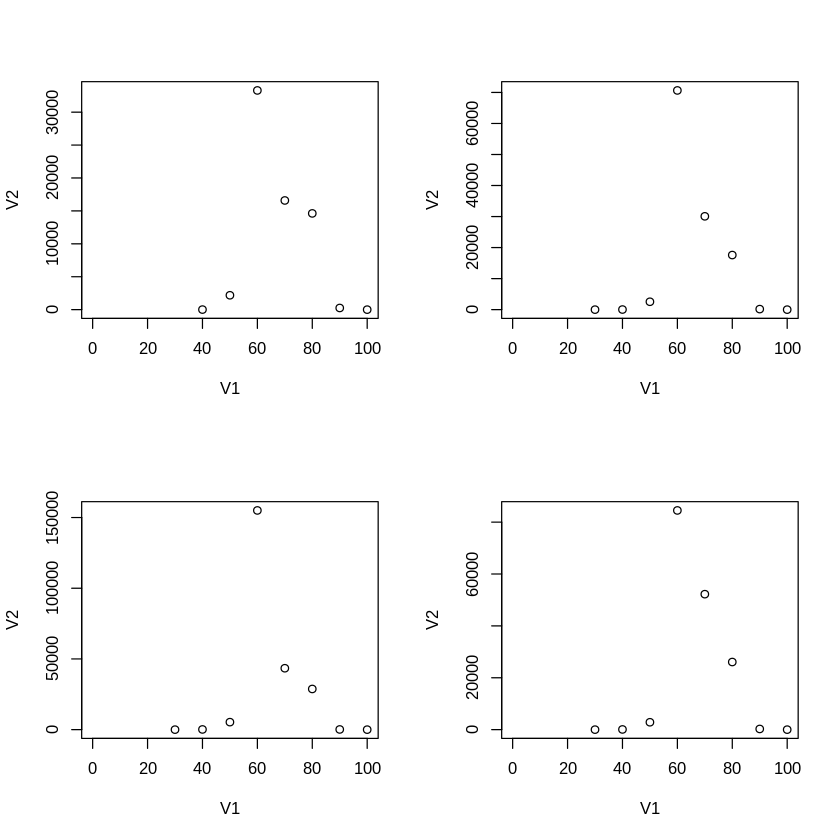

In [258]:
par(mfrow = c(2, 2))
plot_prediction("female", "group B", "master's degree", "standard", "completed");
plot_prediction("male", "group A", "bachelor's degree", "standard", "none");
plot_prediction("female", "group D", "associate's degree", "free/reduced", "completed");
plot_prediction("male", "group E", "some college", "free/reduced", "none");

## Wofür kann man Naive Bayes benutzen?

- Zur Klassifzierung von Datensätzen
- Wenn die einzelnen Merkmale diskret sind (anstatt kontinuierlich)
- Wenn die Merkmale stochastisch unabhängig sind


## Welche Probleme hat Naive Bayes?

- Nimmt eine einzelne Wahrscheinlichkeit null an, ist der ganze Term null
    - Fix: Laplace Smoothing (zu allen Häufigkeiten 1 addieren)
- Naive Bayes nimmt an, dass die Merkmale stochastisch unabhängig sind
    - Ist in vielen Fällen zwar mathematisch unkorrekt, aber in der Praxis meist wenig relevant

## Vielen Dank. Fragen?